In [3]:
HILDA_SHORT = """ParseTree('Contrast[S][N]', ["Although they did n't like it ,", 'they accepted the offer .'])"""
HILDA_LONG = """ParseTree('Elaboration[N][S]', [ParseTree('Joint[N][N]', [ParseTree('Elaboration[N][S]', ['Henryk Szeryng ( 22 September 1918 - 8 March 1988 )', 'was a violin virtuoso of Polish and Jewish heritage .']), ParseTree('Joint[N][N]', [ParseTree('Joint[N][N]', ['He was born in Zelazowa Wola , Poland .', ParseTree('Joint[N][N]', [ParseTree('Background[N][S]', ['Henryk started piano and harmony training with his mother', 'when he was 5 ,']), 'and at age 7 turned to the violin ,'])]), ParseTree('Joint[N][N]', [ParseTree('Elaboration[N][S]', ['receiving instruction from Maurice Frenkel .', ParseTree('Temporal[S][N]', [ParseTree('Elaboration[N][S]', ['After studies with Carl Flesch in Berlin', '( 1929-32 ) ,']), ParseTree('Elaboration[N][S]', ['he went to Paris to continue his training with Jacques Thibaud at the Conservatory ,', 'graduating with a premier prix in 1937 .'])])]), ParseTree('Joint[N][N]', [ParseTree('Elaboration[N][S]', ['He made his solo debut in 1933', 'playing the Brahms Violin Concerto .']), ParseTree('Joint[N][N]', ['From 1933 to 1939 he studied composition in Paris with Nadia Boulanger ,', ParseTree('Joint[N][N]', [ParseTree('Elaboration[N][S]', ['and during World War II he worked as an interpreter for the Polish government in exile', '( Szeryng was fluent in seven languages )']), ParseTree('Elaboration[N][S]', ['and gave concerts for Allied troops all over the world .', 'During one of these concerts in Mexico City he received an offer to take over the string department of the university there .'])])])])])])]), ParseTree('Elaboration[N][S]', [ParseTree('Elaboration[N][S]', [ParseTree('Joint[N][N]', [ParseTree('Attribution[N][S]', ['In 1946 ,', 'he became a naturalized citizen of Mexico .']), ParseTree('Elaboration[N][S]', ['Szeryng subsequently focused on teaching before resuming his concert career in 1954 .', ParseTree('Joint[N][N]', ['His debut in New York City brought him great acclaim ,', ParseTree('Elaboration[N][S]', ['and he toured widely for the rest of his life .', ParseTree('Attribution[S][N]', ['He died', 'in Kassel .'])])])])]), ParseTree('Elaboration[N][S]', [ParseTree('Elaboration[N][S]', [ParseTree('Elaboration[N][S]', ['Szeryng made a number of recordings ,', 'including two of the complete sonatas and partitas for violin by Johann Sebastian Bach , and several of sonatas of Beethoven and Brahms with the pianist Arthur Rubinstein .']), 'He also composed ;']), 'his works include a number of violin concertos and pieces of chamber music .'])]), ParseTree('Elaboration[N][S]', ["He owned the Del Gesu `` Le Duc '' , the Stradivarius `` King David '' as well as the Messiah Strad copy by Jean-Baptiste Vuillaume", ParseTree('Attribution[S][N]', ['which he gave to Prince Rainier III of Monaco .', ParseTree('Elaboration[N][S]', ["The `` Le Duc '' was the instrument", ParseTree('Contrast[N][N]', ['on which he performed and recorded mostly ,', ParseTree('Elaboration[N][S]', [ParseTree('same-unit[N][N]', [ParseTree('Elaboration[N][S]', ['while the latter', "( `` King David ''"]), 'Strad )']), 'was donated to the State of Israel .'])])])])])])])"""

In [8]:
import discoursegraphs as dg
from discoursegraphs.readwrite import RS3FileWriter
from discoursegraphs.readwrite.tree import t

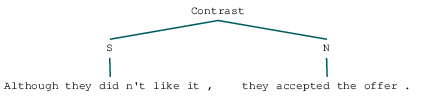

In [9]:
hdt = dg.read_hilda('short.hilda')
hdt

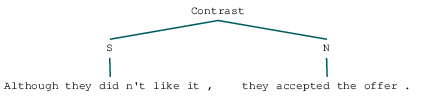

In [14]:
tdt = t('Contrast', [
    ('S', ["Although they did n't like it ,"]),
    ('N', ["they accepted the offer ."])
])
tdt

In [19]:
hdt.pretty_print()

                  Contrast               
         ____________|___________         
        S                        N       
        |                        |        
  Although they            they accepted 
did n't like it ,           the offer .  



In [21]:
hdt.tree.__repr__()

'DGParentedTree(\'Contrast\', [DGParentedTree(\'S\', ["Although they did n\'t like it ,"]), DGParentedTree(\'N\', [\'they accepted the offer .\'])])'

In [18]:
tdt.__repr__()

'DGParentedTree(\'Contrast\', [DGParentedTree(\'S\', ["Although they did n\'t like it ,"]), DGParentedTree(\'N\', [\'they accepted the offer .\'])])'

In [7]:
dg.write_rs3(hdt, 'short.rs3')
%cat short.rs3

<?xml version='1.0' encoding='UTF-8'?>
<rst>
  <header>
    <relations>
      <rel name="Contrast" type="rst"/>
    </relations>
  </header>
  <body>
    <segment id="3" parent="5" relname="Contrast">Although they did n't like it ,</segment>
    <segment id="5" parent="1" relname="span">they accepted the offer .</segment>
    <group id="1" type="span"/>
  </body>
</rst>


In [23]:
dg.write_rs3(hdt.tree, 'shortdg.rs3')
%cat shortdg.rs3

<?xml version='1.0' encoding='UTF-8'?>
<rst>
  <header>
    <relations>
      <rel name="Contrast" type="rst"/>
    </relations>
  </header>
  <body>
    <segment id="3" parent="5" relname="Contrast">Although they did n't like it ,</segment>
    <segment id="5" parent="1" relname="span">they accepted the offer .</segment>
    <group id="1" type="span"/>
  </body>
</rst>


In [24]:
dg.write_rs3(tdt, 'shortt.rs3')
%cat shortt.rs3

<?xml version='1.0' encoding='UTF-8'?>
<rst>
  <header>
    <relations>
      <rel name="Contrast" type="rst"/>
    </relations>
  </header>
  <body>
    <segment id="3" parent="5" relname="Contrast">Although they did n't like it ,</segment>
    <segment id="5" parent="1" relname="span">they accepted the offer .</segment>
    <group id="1" type="span"/>
  </body>
</rst>


In [26]:
input_tree = t("circumstance", [
    ("S", ["foo"]),
    ("N", ["bar"])])
RS3FileWriter(input_tree)

<rst>
  <header>
    <relations>
      <rel name="circumstance" type="rst"/>
    </relations>
  </header>
  <body>
    <segment id="3" parent="5" relname="circumstance">foo</segment>
    <segment id="5" parent="1" relname="span">bar</segment>
    <group id="1" type="span"/>
  </body>
</rst>



In [29]:
longdt = dg.read_hilda('long.hilda')
dg.write_rs3(longdt, 'long.rs3')

In [ ]:
from rstviewer import embed_rs3_image

embed_rs3_image('short.rs3')

# TODO: compare with CODRA

## reading .dis into a document graph

In [ ]:
disdg1 = dg.read_dis(os.path.join(dg.DATA_ROOT_DIR, 'rst-example1.dis'))
type(disdg1)

In [ ]:
# %load_ext gvmagic # load this once

In [ ]:
# %dotstr dg.print_dot(disdg1)

In [ ]:
codra_disfile = 'codra-output-test.txt'
# disdg_codra = dg.read_dis(codra_disfile)

In [ ]:
#children[0]
ParentedTree('Satellite', [ParentedTree('span', ['36', '37']), ParentedTree('rel2par', ['Manner-Means']), ParentedTree('Nucleus', [ParentedTree('leaf', ['36']), ParentedTree('rel2par', ['span']), ParentedTree('text', ['_!by', 'Jean-Baptiste', 'Vuillaume_!'])]), ParentedTree('Satellite', [ParentedTree('leaf', ['37']), ParentedTree('rel2par', ['Elaboration']), ParentedTree('text', ['_!which', 'he', 'gave', 'to', 'Prince', 'Rainier', 'III', 'of', 'Monaco', '._!'])])])


In [ ]:
from discoursegraphs.readwrite.rst.dis.common import DisFile
codra_disfiletree = DisFile(codra_disfile)

In [ ]:
codra_disfiletree.tree

In [ ]:
ct = codra_disfiletree.tree

In [ ]:
EXAMPLE2_FILE = os.path.join(dg.DATA_ROOT_DIR, 'rst-example2.dis')
test_disfiletree = DisFile(EXAMPLE2_FILE)

In [ ]:
test_disfiletree.tree

In [ ]:
from discoursegraphs.readwrite.rst.dis.distree import DisRSTTree

DisRSTTree(EXAMPLE2_FILE)

In [ ]:

# DisFile(codra_disfile, filter_strings=False).tree

In [ ]:
codra_disrsttree = DisRSTTree(codra_disfile)

In [ ]:
codra_disrsttree.tree.leaves()[0] = u'Henryk Szeryng'

In [ ]:
codra_disrsttree.tree.leaves()

In [ ]:
crt = codra_disrsttree.tree



In [ ]:
import re

In [ ]:
EDU_START_RE = re.compile("^_!")
EDU_END_RE = re.compile("_!$")
TRIPLE_ESCAPE_RE = re.compile(r'\\\\\\"') # string contains a " char

In [ ]:

ct

In [ ]:
cleanup_codra_edus(crt)

In [ ]:
class CodraRSTTree(DisRSTTree):
    def __init__(self, dis_filepath, word_wrap=0, debug=False):
        super(CodraRSTTree, self).__init__(dis_filepath, word_wrap=word_wrap, debug=debug)
        self.cleanup_codra_edus()
    
    def cleanup_codra_edus(self):
        """Remove leading/trailing '_!' from CODRA EDUs and unescape its double quotes."""
        for leafpos in self.tree.treepositions('leaves'):
            edu_str = self.tree[leafpos]

            edu_str = EDU_START_RE.sub("", edu_str)    
            edu_str = TRIPLE_ESCAPE_RE.sub('"', edu_str)
            edu_str = EDU_END_RE.sub("", edu_str)

            self.tree[leafpos] = edu_str

In [ ]:
CodraRSTTree(codra_disfile)

In [ ]:
dg.readwrite.rst.rs3.RS3FileWriter(CodraRSTTree(codra_disfile))